# Customer churn prediction using deep learning

#### Churn prediction means detecting which customers are likely to leave a service or to cancel a subscription to a service. It is a critical prediction for many businesses because acquiring new clients often costs more than retaining existing ones. Once you can identify those customers that are at risk of cancelling, you should know exactly what marketing action to take for each individual customer to maximise the chances that the customer will remain.

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'C:\\Users\\Prasa'

In [3]:
os.chdir("C:\\Users\\Prasa\\Downloads")

In [4]:
df = pd.read_csv("Churn_Modelling.csv")

In [5]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5283,5284,15799815,Bobrov,656,Germany,Female,23,4,163549.63,1,0,1,21085.12,0
9694,9695,15659710,Lascelles,581,France,Male,25,5,77886.53,2,1,0,150319.49,0
8918,8919,15578787,Goddard,641,France,Female,52,4,0.00,1,1,0,90964.54,1
434,435,15799384,Collier,683,France,Male,33,8,0.00,1,0,0,73564.44,0
9063,9064,15711521,Egobudike,609,France,Male,39,3,121778.71,1,1,1,138399.67,0


In [1]:
#df.isna().sum()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


### dropping the unneccesary columns.

In [12]:
df = df.drop(["RowNumber","CustomerId","Surname"],axis="columns")

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### unique values of every column.

In [14]:
for col in df:
    print(f'{col} : {df[col].unique()}')

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [15]:
df["Gender"] = df["Gender"].replace({"Male":1, "Female":0})

In [19]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1107,420,Germany,0,34,1,135549.90,1,0,0,149471.13,1
1958,645,France,1,42,6,0.00,1,0,0,149807.01,0
7993,585,France,0,33,4,152805.05,1,1,0,63239.65,0
5964,599,Spain,1,35,6,137102.65,1,0,0,76870.81,0
5115,533,Germany,0,49,1,102286.60,3,1,0,69409.37,1


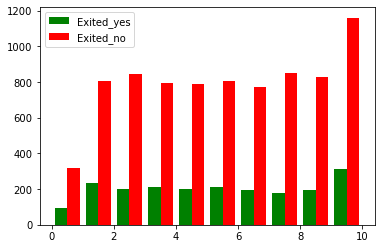

In [30]:
Tenure_no = df[df.Exited == 0].Tenure
Tenure_yes = df[df.Exited == 1].Tenure
plt.hist([Tenure_yes,Tenure_no], color=["green","red"], label=["Exited_yes","Exited_no"])
plt.legend()

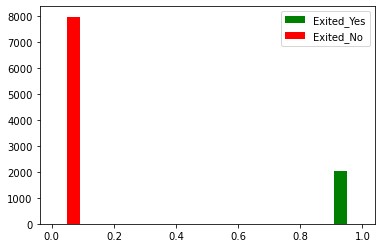

In [32]:
Exited_No = df[df.Exited== 0].Exited
Exited_Yes = df[df.Exited== 1].Exited

plt.hist([Exited_Yes, Exited_No],color=['green','red'],label=['Exited_Yes','Exited_No'])
plt.legend()

## get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables

In [35]:
df1 = pd.get_dummies(data=df, columns=["Geography"])

In [39]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


### MinMaxScalar: Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [41]:
cols_to_scale = ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]

from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
df1[cols_to_scale] = scalar.fit_transform(df1[cols_to_scale])

In [42]:
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,0.332,1,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0
9997,0.718,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0
9998,0.844,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0,1,0


In [44]:
for col in df1:
    print(f"{col} : {df1[col].unique()}")

CreditScore : [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

In [45]:
df1.sample(4)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
8853,0.662,1,0.337838,0.3,0.264405,0.000000,1,1,0.093814,1,1,0,0
9561,0.656,1,0.243243,0.6,0.472097,0.333333,1,0,0.265828,0,0,1,0
239,0.706,1,0.135135,0.2,0.323533,0.333333,0,1,0.814081,0,1,0,0
2338,0.374,1,0.256757,0.3,0.000000,0.333333,1,1,0.102969,0,1,0,0


In [46]:
df1.shape

(10000, 13)

In [47]:
x = df1.drop("Exited", axis="columns")
y = df1["Exited"]

In [49]:
x.shape

(10000, 12)

## spliting data as training and testing...

In [51]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [52]:
x_train.shape

(8000, 12)

## Model:

In [55]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation="relu"),
    keras.layers.Dense(1, activation="sigmoid"),
])

model.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5126 - accuracy: 0.7872
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4591 - accuracy: 0.8016
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4480 - accuracy: 0.8048
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.8065
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.8094
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.8111
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.8119
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4253 - accuracy: 0.8156
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.8171
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4162 - accura

#### here we have only two layers i.e., input layer and out layer. for better accuracy we can give more hidden layers.
#### and we are running the code for 100 epochs.

In [56]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3601 - accuracy: 0.8465


[0.3601361811161041, 0.8464999794960022]

In [57]:
yp = model.predict(x_test)
yp[:10]

array([[0.49425822],
       [0.5314395 ],
       [0.6252818 ],
       [0.05164105],
       [0.6069385 ],
       [0.4472272 ],
       [0.12582311],
       [0.19227299],
       [0.01420906],
       [0.6624794 ]], dtype=float32)

In [58]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [60]:
y_pred[:10]

[0, 1, 1, 0, 1, 0, 0, 0, 0, 1]

In [61]:
y_test[:10]

937     0
9355    0
2293    1
192     0
8675    0
53      1
9596    0
265     0
984     0
9793    0
Name: Exited, dtype: int64

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  float64
 3   Tenure             10000 non-null  float64
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  float64
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  uint8  
 11  Geography_Germany  10000 non-null  uint8  
 12  Geography_Spain    10000 non-null  uint8  
dtypes: float64(6), int64(4), uint8(3)
memory usage: 810.7 KB


### Classification Report

In [63]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1578
           1       0.74      0.42      0.53       422

    accuracy                           0.85      2000
   macro avg       0.80      0.69      0.72      2000
weighted avg       0.84      0.85      0.83      2000



### confusion matrix

Text(69.0, 0.5, 'Truth')

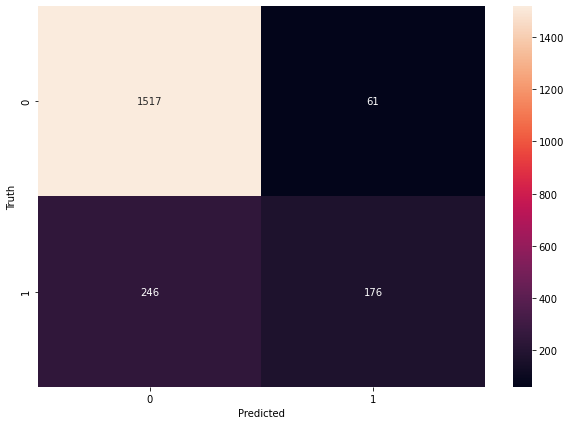

In [73]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

### Accuracy : dividing the number of correct predictions by the total number of predictions

In [75]:
round((1517+176)/(1517+61+246+176),2)

0.85

#### Recall: The ratio between the numbers of Positive samples correctly classified as Positive to the total number of Positive samples. The recall measures the model's ability to detect positive samples. The higher the recall, the more positive samples detected.
#### Recall = True Positive/True Positive + False Negative

### Recall for 0 class

In [76]:
round(1517/(1517+61),2)

0.96

### Recall for 1 class

In [78]:
round(176/(176+246),2)

0.42

#### Precision: Precision is defined as the ratio of correctly classified positive samples (True Positive) to a total number of classified positive samples (either correctly or incorrectly).
#### Precision = True Positive/True Positive + False Positive  


### Precision for 0 class

In [79]:
round(1517/(1517+246),2)

0.86

### Precision for 1 class

In [80]:
round(176/(176+61),2)

0.74